### Arsenii Gavrikov, ВШЭ + ОИЯИ
### gavrikov@jinr.ru

# Часть №3. Линейные модели, деревья решений. Метрики и оценки качества

# Начнем с метрик
Метрика качества модели зависит в том числе от рассматриваемой задачи. 

Одна из цетральных задач в машинном обучении - "обучение с учителем", которую можно разределить на две подзадачи:

- 1) Классификация. $h(x): R^n\rightarrow \{0, 1, ..., k\}$

- 2) Регрессия. $h(x): R^n \rightarrow R$,

где $x \in R^n$ - пространство признаков (фичей), h - модель

# Бинарная классификация - основные метрики

Данные поделены всего на два класса. Всего возможно 4 исхода:

- истинно положительные (TP),
- истинно отрицательные (TN),
- ложно положительные (FP),
- ложно отрицательные (FN).

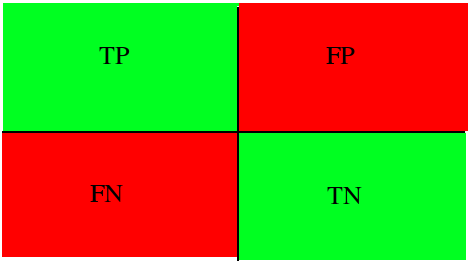


# Бинарная классификация - основные метрики


- Accuracy: $$\frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$$

- Precision: $$\frac{\text{TP}}{\text{TP + FP}}$$

- Recall: $$\frac{\text{TP}}{\text{TP + FN}}$$

- В том случае, если Precision и Recall являются одинаково значимыми, можно использовать их среднее гармоническое (F-мера):
$$\frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

ROC (receiver operating characteristic) – график, показывающий зависимость верно классифицируемых объектов положительного класса от ложно положительно классифицируемых объектов негативного класса. Иными словами, соотношение True Positive Rate (Recall) и False Positive Rate.

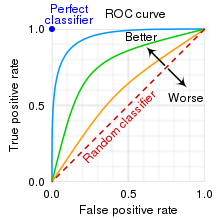

С помощью ROC — кривой, можно сравнить модели, а также их параметры для поиска наиболее оптимальной (с точки зрения tpr и fpr) комбинации.

- AUC (Area Under Curve)

В качестве численной оценки ROC кривой принято брать площадь под этой кривой, которая является неплохим «итогом» для кривой. 

# Регрессия - основные метрики

- Средняя абсолютная ошибка (MAE): $$\frac{1}{n}\sum_{i=1}^{n}{|y_i - \hat{y}_i|}$$
- Средняя абсолютная ошибка в процентах (MAPE): $$\frac{1}{n}\sum_{i=1}^{n}\frac{|y_i - \hat{y}_i|}{y_i}$$
- Среднеквадратическая ошибка (MSE): $$\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y}_i)^2}$$
- Коэффициент детерминации $R^2$: $$1 - \frac{\Sigma(\hat{y}_i - y_i)^2}{\Sigma(\hat{y}_i - \overline{y})^2},$$ 
где $y_i$ — реальные значения, $\hat{y}_i$ — значения, предсказанные моделью, $\overline{y}$ — среднее по реальным значениям.


## Перейдем к моделям. Линейные модели: линейная и логистическая регрессия 

- Линейная регрессия это модель вида: $$y = w_0 + \sum_{i=1}^{m}{w_i x_i},$$
$w$ - параметры модели, x - признаки, y - целевая переменная

Один из способов вычислить значения параметров модели является метод наименьших квадратов (МНК), который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью.

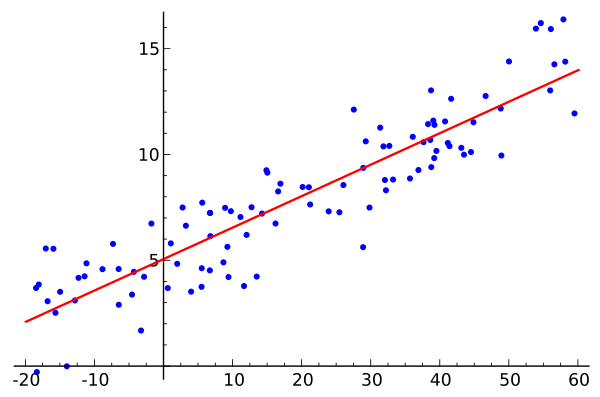

- Логистическая регрессия: $$y = \sigma(w_0 + \sum_{i=1}^{m}{w_i x_i}),$$

где $\sigma(z) = \frac{1}{1 + exp(-z)}$

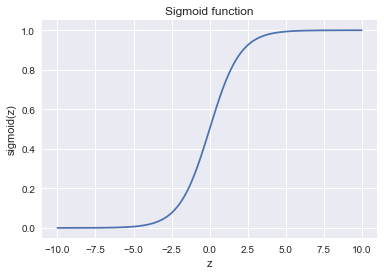

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на два полупространства, в каждом из которых прогнозируется одно из двух значений целевого класса.

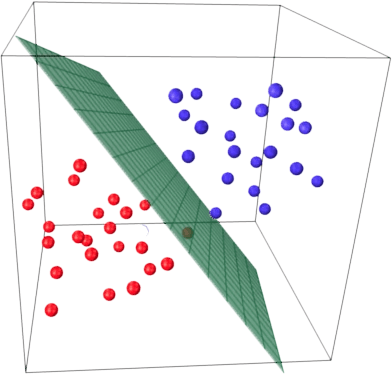


# Деревья решений. 

Собственно, само дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

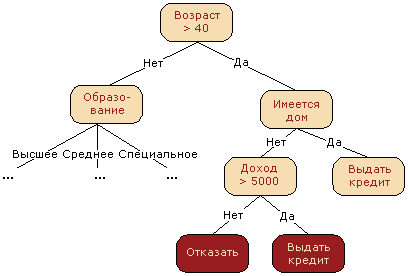

- Критерий разделения:

выбранный атрибут должен разбить множество наблюдений в узле так, чтобы результирующие подмножества были максимально однородны, т.е. количество объектов из других классов («примесей») в каждом из этих множеств было как можно меньше. 

- Критерии остановки:

    - Ранняя остановка — алгоритм будет остановлен, как только будет достигнуто заданное значение некоторого критерия, например процентной доли правильно распознанных примеров
    
    - Ограничение глубины дерева — задание максимального числа разбиений в ветвях, по достижении которого обучение останавливается
    
    - Задание минимально допустимого число примеров в узле — запретить алгоритму создавать узлы с числом примеров меньше заданного

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/adult.csv')
data.head(3)

age  workclass  fnlwgt   education  educational-num      marital-status  \
0   25    Private  226802        11th                7       Never-married   
1   38    Private   89814     HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm               12  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   
2    Protective-serv      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K

In [3]:
# Таким образом, перед нами стоит задача бинарной классификации. Пусть доход до 50 тысяч будет 0, а доход после 50 тысяч обозначим за 1.
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [4]:
y = (data['income'] == '>50K').astype(int)
X = data.drop(['income'], axis=1)

In [5]:
# У нас имеется достаточно большое кол-во категориальных переменных, обработаем их с помошью pd.get_dummies.
X = pd.get_dummies(X, columns=['age','workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'educational-num'])
X.head(3)

fnlwgt  capital-gain  capital-loss  hours-per-week  age_17  age_18  age_19  \
0  226802             0             0              40       0       0       0   
1   89814             0             0              50       0       0       0   
2  336951             0             0              40       0       0       0   

   age_20  age_21  age_22  ...  educational-num_7  educational-num_8  \
0       0       0       0  ...                  1                  0   
1       0       0       0  ...                  0                  0   
2       0       0       0  ...                  0                  0   

   educational-num_9  educational-num_10  educational-num_11  \
0                  0                   0                   0   
1                  1                   0                   0   
2                  0                   0                   0   

   educational-num_12  educational-num_13  educational-num_14  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   

   educational-num_15  educational-num_16  
0                   0                   0  
1                   0                   0  
2                   0                   0  

[3 rows x 196 columns]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_train_predict = clf.predict_proba(X_train)[:, 1]
y_test_predict = clf.predict_proba(X_test)[:, 1]

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_test = roc_auc_score(y_test, y_test_predict)
roc_auc_train = roc_auc_score(y_train, y_train_predict)

print('Train: ', roc_auc_train)
print('Test: ', roc_auc_test)

Train:  0.5858029796442582
Test:  0.591765506180715


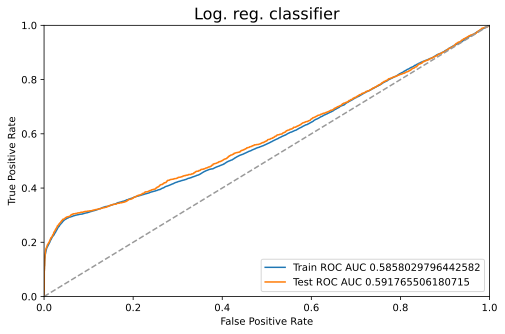

In [10]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(8,5))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log. reg. classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [11]:
from sklearn.metrics import classification_report

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7391
           1       0.72      0.27      0.39      2378

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769



In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [13]:
y_train_predict = clf.predict_proba(X_train)[:, 1]
y_test_predict = clf.predict_proba(X_test)[:, 1]

In [14]:
roc_auc_test = roc_auc_score(y_test, y_test_predict)
roc_auc_train = roc_auc_score(y_train, y_train_predict)

print('Train: ', roc_auc_train)
print('Test: ', roc_auc_test)

Train:  0.8542899328839876
Test:  0.858390725701331


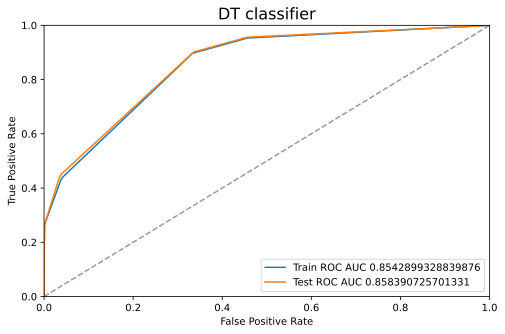

In [15]:
plt.figure(figsize=(8,5))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [16]:
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      7391
           1       0.80      0.44      0.57      2378

    accuracy                           0.84      9769
   macro avg       0.82      0.70      0.73      9769
weighted avg       0.83      0.84      0.82      9769



In [17]:
from sklearn.tree import export_graphviz
from subprocess import call, check_call
from IPython.display import Image

export_graphviz(clf, out_file='tree.dot',
                feature_names = X_train.columns,
                class_names = ['Low income', "High income"],
                rounded = True, proportion = False,
                precision = 2, filled = True)
call('dot -Tpng tree.dot -o tree.png -Gdpi=900', shell=True)
Image(filename = 'tree.png')

In [18]:
# !jupyter nbconvert Part3.ipynb --to slides --post serve --SlidesExporter.reveal_theme=serif  --SlidesExporter.reveal_scroll=True  --SlidesExporter.reveal_transition=none